<img src='./imgs/ACCSO-Logo.png' align='left' width='50%'/> <img src='./imgs/WEkEO-Logo.png' align='right' width='25%'/>

**Authors:**  Nicolai Minter, Florian Netzer, Katrin Pöppelmann, Janik Tinz, Patrick Tinz <br>
**Copyright:** 2022 MINTER, NETZER, POEPPELMANN, TINZ, TINZ <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h3>CORINE LAND COVER DATASET TUTORIAL</h3></div>

# NOTEBOOK INTRODUCTION

### Data

| Product Description | Data Store collection ID | Product Navigator | WEkEO HDA ID | WEkEO metadata |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| Corine Land Cover (CLC) 2018 | EO:CLMS:DAT:CORINE | <a href="https://land.copernicus.eu/pan-european/corine-land-cover/clc2018?tab=mapview" target="_blank">link</a> | EO:CLMS:DAT:CORINE | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3ACLMS%3ADAT%3ACORINE" target="_blank">link</a> |

### Learning outcomes

At the end of this notebook you will know:
* How to download the Corine Land Cover (CLC) dataset using the WEkEO API request.
* How to visualise the CLC data in GeoTIFF and GeoPackage data formats.
* How the CRISP-DM process model is structured.
* How to gain data understanding.


### Outline

This notebook was made by a team of software developers, supported by the German Software Engineering company [Accso](https://accso.de/), as a contribution to the [Jupyter Notebook Competition](https://notebook.wekeo.eu/) hosted by [WEkEO](https://www.wekeo.eu/).

In this notebook, we aim to give a tutorial on how to work with the CLC dataset for beginners. The tutorial is meant for non-data scientists with little knowledge about either geodata analysis, Python libraries, using the WEkEO API client or the GeoPackage and GeoTIFF data formats. The user will  learn how to download the CLC dataset in both of these data formats. Some advantages and disadvantages of each format are listed. We will further analyse our data in both formats, using the Rasterio, Pyplot and GeoPandas libraries among others. For each format, the user will be able to follow the analysis steps from reading the meta data, easy visualisations of the data using histograms and graphs and also learn about some slightly more advanced methods of visualisation later on. Finally, we challenge the reader to apply their new knowledge by writing their own code.

We do not claim to give an exhaustive manual on how to work with this data. The notebook is meant as a first contribution to explaining the handling of the CLC data in GeoTIFF and GeoPackage file formats. It would profit from being expanded by creators with more extensive knowledge on how to work with GeoTIFF and GeoPackage file formats. Another creator is also welcome to insert a new section on how to work with the 'ESRI fgdb' file format to cover all three available formats of the CLC dataset. 
<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Data and analysis method description](#section1)
 2. [Downloading and extracting the dataset](#section2)
 3. [Understanding and working with our data](#section3)


<hr>

In order to work with our data, we need to first install and then import some libraries. The pip command is used to install the libraries defined in the 'requirements.txt' file. Now that our kernel knows these libraries, we can import them into our notebook using the import command. It is common practice to do this step in the beginning of a notebook before any other code.

In [1]:
from IPython.display import clear_output
%pip install -r requirements.txt
clear_output()

In [2]:
# library imports
import zipfile
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pandas as pd
from hda import Client
import rasterio
from rasterio.windows import Window
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.enums import Resampling
from collections import Counter

%run helpers.ipynb

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Data and analysis method description
[Back to top](#TOC_TOP)

</div>

### 1.1 Data Description
The data set [CORINE Land Cover (CLC)](https://land.copernicus.eu/pan-european/corine-land-cover/clc2018) of the year 2018 is used.

The CLC inventory was initiated in 1985 (reference year 1990). Updates have been produced in 2000, 2006, 2012, and 2018. The CLC covers the territory of 29 European countries.
It consists of an inventory of land cover in 44 distinct classes. Each of these classes is associated with an individual color. Six examples for such classes are: 
- Olive groves
- Pastures
- Annual crops associated with permanent crops
- Complex cultivation patterns
- Land principally occupied by agriculture, with significant areas of natural vegetation
- Agro-forestry areas

To see a visual representation, we refer you to the [WEkEO website](https://www.wekeo.eu/data?view=viewer&t=1658793600000&z=0&center=4.64037%2C55.25297&zoom=11.5&layers=W3siaWQiOiJjMCIsImxheWVySWQiOiJFTzpDTE1TOkRBVDpDT1JJTkUvX19ERUZBVUxUX18vY2xjIiwiekluZGV4Ijo3MH1d&initial=1). 

### 1.2 Analysis method
In this notebook, we recommend the process model CRISP-DM (Cross Industry Standard Process for Data Mining) for data analysis. It is a standard cross-industry model for data mining. CRISP-DM is application-neutral and can be used in any field. The process model defines six different phases that have to be passed through once or several times. The six process phases are shown in the following figure. 

<img src="./imgs/CRISP_DM_ACCSO.png" alt="" width="700">

1. Business Understanding:  
In this phase, the specific goals and requirements for data mining are defined. The result of this phase is the formulation of a concrete task.   

2. Data Understanding:   
In the context of data understanding, one obtains an initial overview of the available data and its quality. An analysis and evaluation of the data quality is carried out. Problems with the available data in relation to the previous task are named.    

3. Data Preparation:    
Data preparation is used to create a final data set that forms the basis for the next phase of modeling.

4. Modeling:   
During modeling, appropriate data mining methods are applied to the prepared data set. Typical for this phase are the optimization of parameters and the creation of multiple models.

5. Evaluation:   
In the evaluation, the trained models are assessed in relation to the task. The best model is finally selected. 

6. Deployment:   
The final phase of the Cross Industry Standard Process for Data Mining is deployment. In this phase, the selected model is operationalized in a production application so that it achieves added value for the client.

Phases 1, 3, 4, 5 and 6 depend on the individual use case of the data. This notebook assumes the user already has an appropriate use case for their data and is now in the second phase of the CRISP-DM process - Data Understanding. This is a crucial step in working with any kind of data and is also applicable to other datasets and formats. This notebook provies some guidance to working with the WEkEO client, the CLC dataset and the TIFF and GeoPackage data formats, focusing on data understanding. It serves as a basis for further developments.   

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Downloading and extracting the dataset
[Back to top](#TOC_TOP)

</div>

In order to work with our WEkEO dataset, we first have to download it. Since we want to work with the data in different formats, we download the "GeoTiff100mt" and the "GeoPackage" versions.

Using this [link to the CLC Dataset on the WEkEO website](https://www.wekeo.eu/data?view=viewer&t=1658793600000&z=0&center=6.72816%2C54.07458&zoom=11.28&layers=W3siaWQiOiJjMCIsImxheWVySWQiOiJFTzpDTE1TOkRBVDpDT1JJTkUvX19ERUZBVUxUX18vY2xjIiwiekluZGV4Ijo3MH1d&initial=1), click the download button to get the appropriate dataset description. 

<img src="./imgs/WEkEO_download_selection.PNG" alt="" width=300>

Select the 2018 dataset and the data format in which you wish to download the data. We discuss the GeoTIFF and GeoPackage formats in this notebook.
Then select 'Show API request' to get the matching data description. We now save these descriptions to the new 'data_tif' and 'data_gpg' variables.

In [3]:
data_tif = {
    "datasetId": "EO:CLMS:DAT:CORINE",
    "stringChoiceValues": [
        {
            "name": "product_type",
            "value": "Corine Land Cover 2018"
        },
        {
            "name": "format",
            "value": "GeoTiff100mt"
        }
    ]
}

In [4]:
data_gpg = {
  "datasetId": "EO:CLMS:DAT:CORINE",
  "stringChoiceValues": [
    {
      "name": "format",
      "value": "GeoPackage"
    },
    {
      "name": "product_type",
      "value": "Corine Land Cover 2018"
    }
  ]
}

In order for the next step to work, make sure to have a file called '.hdarc' in your /home/jovyan/ folder where you give the credentials to your WEkEO account. If you are not familiar with this step, please refer to the [WEkEO HDA python library documentation](https://www.wekeo.eu/docs/hda-python-lib).

Now we can download our dataset in the desired format as a .zip file from WEkEO's servers.

In [5]:
#c = Client(debug=False)

#matches = c.search(data_tif)
#matches.download()

In [6]:
#c = Client(debug=False)

#matches = c.search(data_gpg)
#matches.download()

In the next step, we extract the data from the zip file and save it to the data folder. After this step, the zip file is not needed anymore and can be deleted.

In [7]:
#zip_ref = zipfile.ZipFile("u2018_clc2018_v2020_20u1_raster100m.zip")
#zip_ref.extractall("./data")
#zip_ref.close() # close file

In [8]:
#zip_ref = zipfile.ZipFile("u2018_clc2018_v2020_20u1_geoPackage.zip")
#zip_ref.extractall("./data")
#zip_ref.close() # close file

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Understanding and working with our data
[Back to top](#TOC_TOP)

</div>

### 3.1 Understanding format differences

#### 3.1.1 [GeoTIFF](https://en.wikipedia.org/wiki/GeoTIFF):
The Tagged Image File Format (TIFF) is a data format for saving rastered image data. GeoTIFF is a variant of TIFF for georeferencing information embedded in the TIFF file. It includes additionional information about the coordinate reference system in the metadata. GeoTIFF is the standard for displaying raster data. 

##### Advantages:
- relatively small file size (note that our raster100m.zip file is only 125 MB compared to the 3,5 GB of the geoPackage.zip)
- can store multiple bands of information

##### Disadvantages:
- fixed resolution based on the raster size
- information access is less convenient than with GeoPackage

#### 3.1.2 [GeoPackage](https://en.wikipedia.org/wiki/GeoPackage):
The GeoPackage has the data not as a raster, but defined with polygons. It contains data and metadata tables in an SQLite database file. 

##### Advantages:
- not limited by raster resolution
- areas and length can be calculated automatically
- the format is based on SQLite, the support of SQL commands is simple

##### Disadvantages:
- parallel or synchronous editing by multiple users is not supported
- relatively large file size
- slower processing

### 3.2 Understanding and visualizing the data using the GeoTIFF format

#### Opening data

The first step is to open the GeoTIFF data using Rasterio.

Rasterio is a GDAL and Numpy-based Python library, which provides useful functions for working with geospatial raster data. It is not the only option for working with GeoTIFF files but we decided on it for its simplicity. We have already installed Rasterio using the requirements file for the pip command in the beginning of this notebook. Now, we can use Rasterio's open() function to open our file and save it to our new variable 'dataset'.

In [9]:
tif_path = 'data/u2018_clc2018_v2020_20u1_raster100m/DATA/U2018_CLC2018_V2020_20u1.tif'   # set path
dataset = rasterio.open(tif_path)

#### Reading metadata

First, we want to display metadata to learn more about the structure of our dataset. Therefore, we print the meta attribute of our dataset.

In [10]:
dataset.meta

{'driver': 'GTiff',
 'dtype': 'int8',
 'nodata': -128.0,
 'width': 65000,
 'height': 46000,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["ETRS_1989_LAEA",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3035"]]'),
 'transform': Affine(100.0, 0.0, 900000.0,
        0.0, -100.0, 5500000.0)}

- driver: [GTiff](https://gdal.org/drivers/raster/gtiff.html) is the driver of our dataset, meaning it is the library used to handle the GeoTIFF file format
- dtype: Our datatype is an [int8](https://doc.embedded-wizard.de/int-type?v=9.30), which means that each data point consists of 8 Bits which gives a number range from –128 to 127
- nodata: -128 is the value assigned to mean that in those coordinates, there is no data available
- width: 65000 is the width of our raster, which is two dimensional
- height: 46000 is the height of our raster
- count: is the number of data bands, our dataset has only one band
- [crs](https://rasterio.readthedocs.io/en/latest/api/rasterio.crs.html): determines which coordinate reference system is used for the data, here the system is described in wkt (well known text) format
- [transform](https://rasterio.readthedocs.io/en/latest/topics/georeferencing.html#coordinate-transformation): describes the mapping of the raster coordinates to the world coordinate system using a matrix

There is more metadata that is not automatically displayed in the .meta attribute. For example .name gives the path of our .tif file.

In [11]:
dataset.name

'data/u2018_clc2018_v2020_20u1_raster100m/DATA/U2018_CLC2018_V2020_20u1.tif'

Now that we have a first understanding of the structure of our data, we can use the Rasterio read() function to read the values into a new variable 'data'. Since we know the width and height of our raster, we already know the output will be a 65000 by 46000 array. This is much too large to be printed to the console, so only some values in the corners of our array are displayed. As you can see, all those values of -128 indicate that there is no data available. This is not surprising, since the land area is found in the middle of our mapping.

In [12]:
data = dataset.read()
data

array([[[-128, -128, -128, ..., -128, -128, -128],
        [-128, -128, -128, ..., -128, -128, -128],
        [-128, -128, -128, ..., -128, -128, -128],
        ...,
        [-128, -128, -128, ..., -128, -128, -128],
        [-128, -128, -128, ..., -128, -128, -128],
        [-128, -128, -128, ..., -128, -128, -128]]], dtype=int8)

We can learn even more about our data by looking at the attributes of our [array](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html). As an example, we want to know the number of values, which is given by the .size attribute. Since we know the height and width, we already know the size will be 65000 x 46000 = 2.990.000.000 data points, which is quite a lot.

In [13]:
data.size

2990000000

There are also functions you can apply to the array, for example .min() and .max(), which give the minimal and maximal values in the array.

In [14]:
print("Minimal value:", data.min())
print("Maximal value:", data.max())

Minimal value: -128
Maximal value: 48


#### Histogram

Using a histogram, we can visualize the frequency of different values. As you can see, the nodata value is the most frequent. Between -128 and 0, there are no values. The relevant data is between 0 and 48.
Rasterio's function [show_hist](https://rasterio.readthedocs.io/en/latest/api/rasterio.plot.html#rasterio.plot.show_hist) takes an open TIFF file, in our case 'dataset', a parameter bins, which determines the column width (the larger the value, the thinner the column) and a title as a string. 

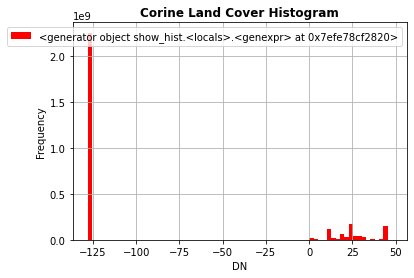

In [15]:
show_hist(dataset, bins=70, title="Corine Land Cover Histogram")

#### Graph

Now, let's have a first look at a visual representation of our raster using Rasterio. Without any [cmap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) parameter, the color map will be 'viridis'.

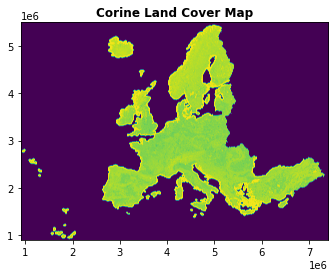

<AxesSubplot:title={'center':'Corine Land Cover Map'}>

In [16]:
show(dataset, title='Corine Land Cover Map')

If we choose another color map, the graph will look very different.

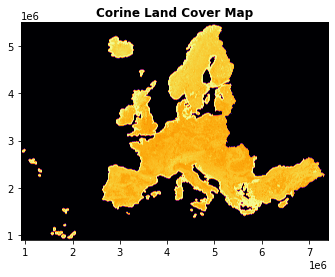

<AxesSubplot:title={'center':'Corine Land Cover Map'}>

In [17]:
show(dataset, cmap='inferno', title='Corine Land Cover Map')

Alternatively, we can use Matplotlib's Pyplot functions to display our data. As you can see, the standard color scheme is also 'viridis', but the axes are labeled in accordance with the array rows and columns.

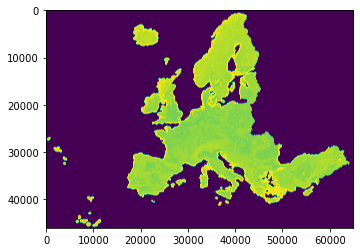

In [18]:
plt.imshow(dataset.read(1))
plt.show()

#### Cropping data using a window

We can also define a specific window of data which we wish to display. The first two parameters give the x and y coordinates of the upper left corner of the window you wish to define. The third and fourth parameters give the width and height of the resulting window. For example, this window is defined so that the UK will be displayed.

In [19]:
window = Window(19500, 12000, 9500, 12500)
data_cropped = dataset.read(window=window, masked=True)

Rasterio:

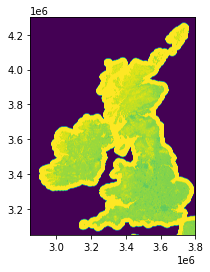

<AxesSubplot:>

In [20]:
show(data_cropped, transform=dataset.window_transform(window))

Pyplot:

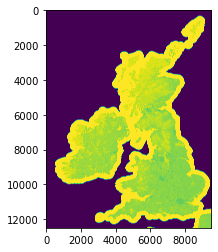

In [21]:
plt.imshow(data_cropped.squeeze())
plt.show()

#### Adding proper colors
The CLC GeoPackage dataset contains a legend containing all the classes with some nice colors assinged to each area type (forests green, water blue etc.) in several data formats. We choose the .csv format since it is easy to read and understand. The GeoTiff dataset does not contain the legend in this format, but since the same labels are used in both data formats, we can apply this legend to the GeoTIFF dataset as well. 

We read the CLC_legend.csv file into a new variable 'legend', which is a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Where RGB values are missing, we use [fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) to fill it up with white color. Then, we apply a function to convert the RGB values to hex format to work with them further. See how the legend looks after the conversions printed below.

As a next step, we generate some [dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) that map different columns of our legend to each other as key-value pairs. This helps us later on.

In [22]:
legend = pd.read_csv("data/u2018_clc2018_v2020_20u1_geoPackage/Legend/CLC_legend.csv", delimiter = ";")
legend["RGB"] = legend["RGB"].fillna("000-000-000") # fill missing data with white color
legend["RGB"] = legend["RGB"].apply(lambda c : '#%02x%02x%02x'%tuple(int(x) for x in c.split("-"))) # convert RGB to hex

#load color to code mappings into a python dict
code_color = pd.Series(legend.RGB.values,index=legend.CLC_CODE).to_dict() # CLC_CODE is key, RGB is value
code_gridcode = pd.Series(legend.GRID_CODE.values,index=legend.CLC_CODE).to_dict() # CLC_CODE is key, GRID_CODE is value
gridcode_color = pd.Series(legend.RGB.values,index=legend.GRID_CODE).to_dict() # GRID_CODE is key, RGB is value
gridcode_label = pd.Series(legend.LABEL3.values,index=legend.GRID_CODE).to_dict() # GRID_CODE is key, LABEL3 is value

legend

,GRID_CODE,CLC_CODE,LABEL3,RGB
0,1,111,Continuous urban fabric,#e6004d
1,2,112,Discontinuous urban fabric,#ff0000
2,3,121,Industrial or commercial units,#cc4df2
3,4,122,Road and rail networks and associated land,#cc0000
4,5,123,Port areas,#e6cccc
5,6,124,Airports,#e6cce6
6,7,131,Mineral extraction sites,#a600cc
7,8,132,Dump sites,#a64d00
8,9,133,Construction sites,#ff4dff
9,10,141,Green urban areas,#ffa6ff


TODO hier noch mehr erklären

<Figure size 2000x2000 with 0 Axes>

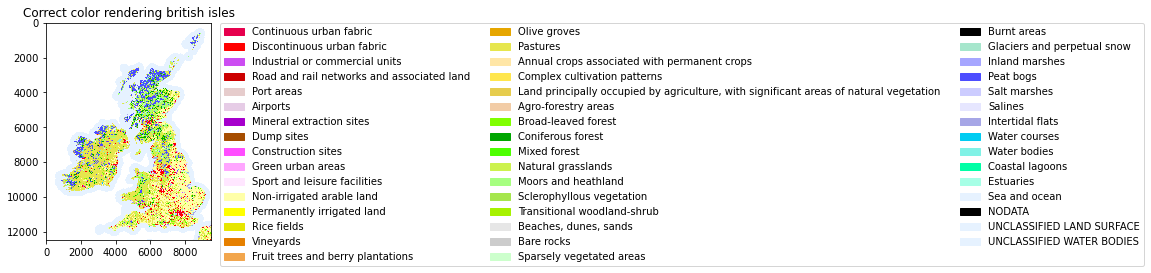

In [23]:
# make a color map of fixed colors
plt.figure(dpi=2000, figsize=[1, 1]) 
fig = plt.subplots()

#load the colors into a matplotlib cmap
cmap = mpl.colors.ListedColormap(gridcode_color.values())
cmap.set_under([1,1,1])
bounds=np.array(list(gridcode_color.keys())) 
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
img = plt.imshow(data_cropped.squeeze(),interpolation='None',
                    cmap = cmap,norm=norm)

#add a legend to the plot
colors = [ img.cmap(img.norm(value)) for value in gridcode_color.keys()]
patches = [ mpl.patches.Patch(color=colors[i], label= gridcode_label[list(gridcode_color.keys())[i]] ) for i in range(len( gridcode_color.keys())) ]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,ncol = 3 )



plt.title("Correct color rendering british isles")
plt.show()


TODO achsen Beschriftung/zahlen enrfernen

With the legend we can also color the histogram to show the total area by type in our map section.


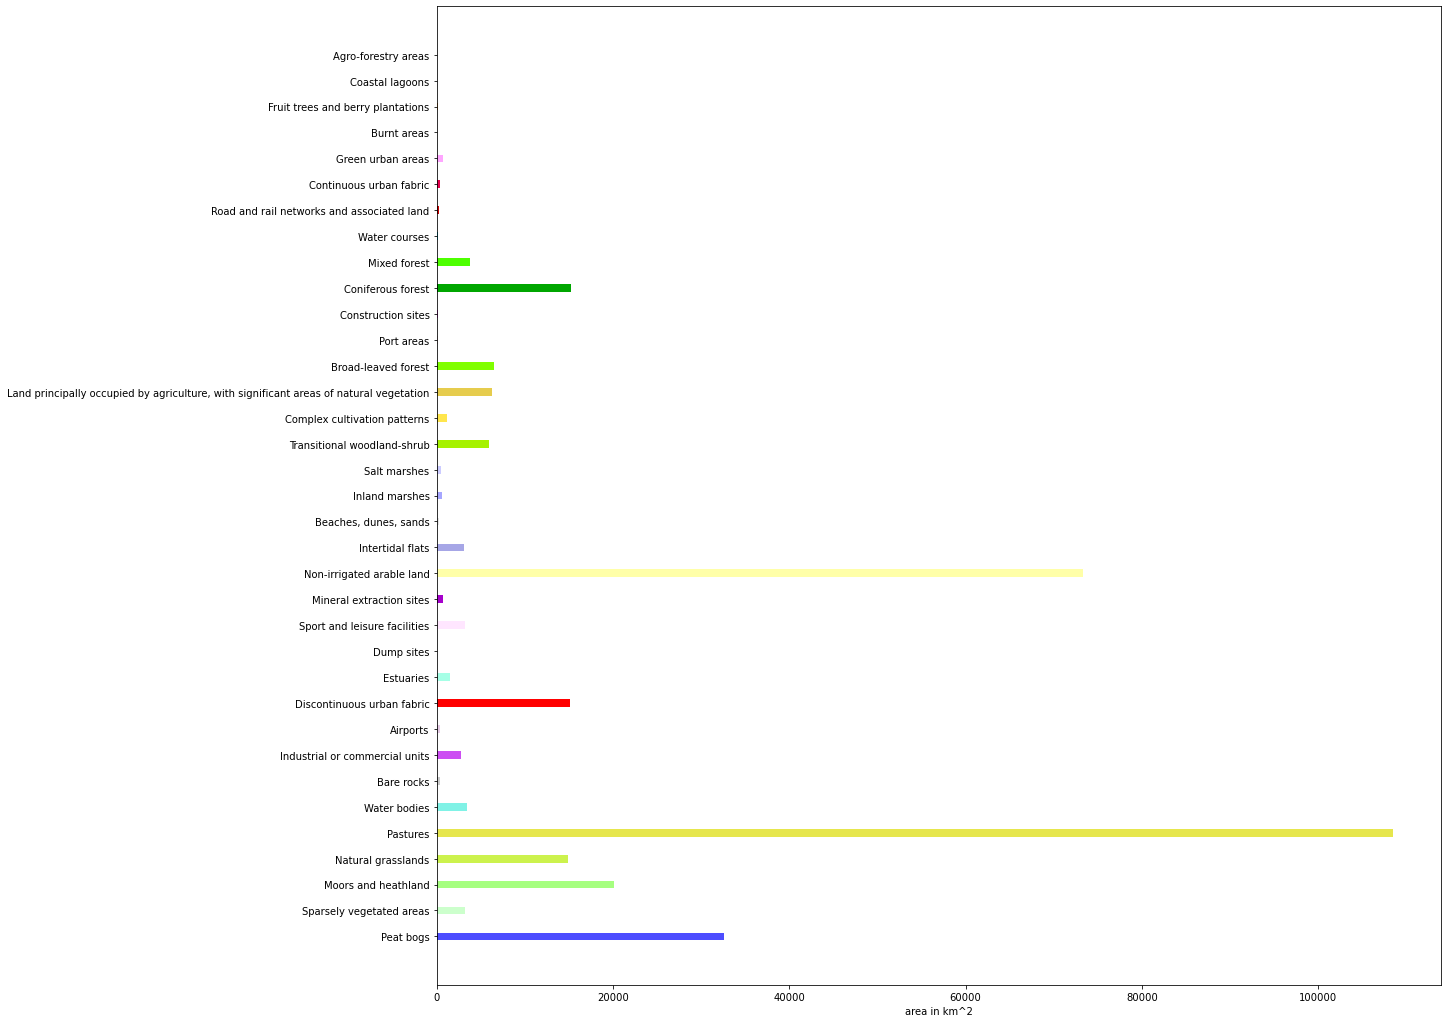

In [24]:
d = Counter(data_cropped.flatten().tolist())
d.pop(-128) # remove unclassified area
d.pop(44) # remove sea and ocean area

fig = plt.figure(figsize=(18,18))

# one value in the raster is a 100m * 100m spot. Divide by 1e6 to get the value in km^2 
values = [ (v * 100 * 100)/1e6  for v in  d.values()]
plt.barh([gridcode_label[k] for k in d.keys()] ,values ,color=[gridcode_color[k] for k in d.keys()], height = 0.3, align = 'center')
plt.xlabel("area in km^2")
plt.show()


### 3.2.2 Using GeoPackage

As an alternative to the GeoTIFF format the CLC dataset is also available as in a GeoPackage format. 
The GeoPackage has the data not as a raster, but defined with [polygons](https://autogis-site.readthedocs.io/en/latest/notebooks/L1/geometric-objects.html).
This has the advantage of not being limited by the raster resolution, but is also slower when processing.
An easy way to load the data is with the GeoPandas library.

#### Reading data

We read the file into a new variable 'gdf'. Note how the loading takes much longer than with the GeoTIFF data because of the larger file size. Printed below, you can see an excerpt of how the data is represented in the GeoPackage file format.

[GeoPandas](https://geopandas.org/en/stable/index.html) stores the data in a [GeoDataFrame](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html), which is a subclass of a [Pandas Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), with additional methods for geospatial operations like coordinate transformations.

In [25]:
gdf = gpd.read_file("data/u2018_clc2018_v2020_20u1_geoPackage/DATA/U2018_CLC2018_V2020_20u1.gpkg")
gdf

,Code_18,Remark,Area_Ha,ID,geometry
0,111,None,130.863654,EU_1,"MULTIPOLYGON (((1917182.160 943608.860, 191714..."
1,111,None,53.744524,EU_2,"MULTIPOLYGON (((1953122.840 950507.440, 195311..."
2,111,None,30.719104,EU_3,"MULTIPOLYGON (((1956709.150 951094.550, 195669..."
3,111,None,50.201782,EU_4,"MULTIPOLYGON (((1805587.500 950821.540, 180555..."
4,111,None,481.848803,EU_5,"MULTIPOLYGON (((1792547.840 952643.380, 179251..."
...,...,...,...,...,...
2375401,512,None,807.040751,EU_2375402,"MULTIPOLYGON (((4958287.940 5319798.460, 49582..."
2375402,512,None,141.362708,EU_2375403,"MULTIPOLYGON (((4955932.460 5325540.080, 49558..."
2375403,512,None,246.634201,EU_2375404,"MULTIPOLYGON (((4956804.160 5330567.090, 49567..."
2375404,512,None,41.845799,EU_2375405,"MULTIPOLYGON (((4957909.360 5364282.460, 49579..."


In [26]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2375406 entries, 0 to 2375405
Data columns (total 5 columns):
 #   Column    Dtype   
---  ------    -----   
 0   Code_18   object  
 1   Remark    object  
 2   Area_Ha   float64 
 3   ID        object  
 4   geometry  geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 90.6+ MB


In [27]:
gdf.crs

<Derived Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Europ

'driver': 'GTiff',
 'dtype': 'int8',
 'nodata': -128.0,
 'width': 65000,
 'height': 46000,
 'count': 1,
 'crs'

In [28]:
gdf.area

0          1.308637e+06
1          5.374452e+05
2          3.071910e+05
3          5.020178e+05
4          4.818488e+06
               ...     
2375401    8.070408e+06
2375402    1.413627e+06
2375403    2.466342e+06
2375404    4.184580e+05
2375405    4.334639e+05
Length: 2375406, dtype: float64

In [29]:
gdf.flags

<Flags(allows_duplicate_labels=True)>

In [30]:
gdf.values

array([['111', None, 130.86365376999143, 'EU_1',
       ['111', None, 53.7445236800477, 'EU_2',
       ['111', None, 30.719103909971782, 'EU_3',
       ...,
       ['512', None, 246.63420074006387, 'EU_2375404',
       ['512', None, 41.845799324996726, 'EU_2375405',
       ['512', None, 43.346390415039146, 'EU_2375406',
      dtype=object)

Each line in the dataframe contains an area defined as a shapely multipolygon, with the label code.

Plotting the complete geopackage is computationally intensive, but with GeoPandas we can easily cut a section from the data.

In [ ]:
#load a GeoDataframe containg outlines of countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#polygon with the outline of the British Isles
britishIsles_outline = world[world["name"].isin( ['United Kingdom', 'Ireland']) ]
 
#convert the polygon to the same coordinate reference system(CRS) as the CLC data
britishIsles_outline = britishIsles_outline.to_crs(gdf.crs)
#Clip the CLC data with the outline of the british isles
britishIsles = gpd.clip(gdf,britishIsles_outline)

#load colors from the legend into the GeoDataframe
britishIsles["color"] = britishIsles["Code_18"].apply(lambda code: code_color[int(code)])

britishIsles.plot( color=britishIsles['color'] )

TODO achsenbeschriftung entfernen

similar to the procedure with the tiff we can use the area in the geopackage to create a bar chart with the total area by type in our map section.

In [ ]:
britishIsles["gridcode"] =  britishIsles["Code_18"].apply(lambda code: code_gridcode[int(code)])
britishIsles["area_km^2"] =  britishIsles["Area_Ha"].apply(lambda ha:ha/100)
gdf_sum = britishIsles.groupby(['gridcode'])['area_km^2'].agg('sum') #sum the area by the code
d = gdf_sum.to_dict()
d.pop(44)


fig = plt.figure(figsize=(18,18))


plt.barh([gridcode_label[k] for k in d.keys()] ,d.values() ,color=[gridcode_color[k] for k in d.keys()], height = 0.3, align = 'center')
plt.xlabel("area in km^2")
plt.show()

At this point, we have performed the first steps of data understanding, which is a continuous process in the CRISP DM model and might be returned to at any point before the final deployment. We gained an understanding and visualised our data in both the GeoTIFF and GeoPackage formats. Now, depending on the underlying use case, we could go to the third step of CRISP DM - Data Preparation. Here we would continue to prepare the data, for example for a machine learning use case. However, that next step is not in the scope of this notebook.  

Finally, the user in encouraged to apply the knowledge found in this notebook to better understand and visualise another geographical area covered in the CLC dataset. If you live in a European country available in the CLC dataset, we suggest you apply the challenge to your home country! Otherwise, select any country you prefer, for example our home country Germany.

<div class="alert alert-block alert-warning">

### Challenge:

Try to better understand and visualise the land cover of your home country. Use the CLC dataset in the GeoTIFF and/or the GeoPackage format.
    
[Back to top](#TOC_TOP)
 <div>

In [ ]:
# Enter your solution here


<hr>